# Assignment :Image Classification Using Neuron

In [1]:
# Change the datasets shape 
#Add extra nuron with activation function "Relu" don't use "tanh" activation function
#Submit it on your gitHub repository.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import train_test_split
import os
os.getcwd()

'C:\\Users\\fkari653\\Downloads'

In [24]:
np.random.seed(1)

In [25]:
train_images = []
train_labels = []
shape = (150, 150)

train_datasets_path = "train_zip/train/"

for filename in os.listdir("train_zip/train/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(train_datasets_path, filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
        
        
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=1)

In [27]:
test_images = []
test_labels = []
shape = (150,150)

test_datasets_path = "test_zip/test/"

for filename in os.listdir("test_zip/test/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(test_datasets_path, filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
        
        
test_images = np.array(test_images)

# Models

In [28]:
model = Sequential()
# 1st / Input Layer
model.add(Conv2D(kernel_size = (3, 3), filters = 32, activation = 'relu', input_shape = (150, 150, 3)))


# 1st Hidden Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

# 2nd Hidden Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

##bridge Layer
model.add(Flatten())


# Output Layer

model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


In [29]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
             metrics = ['acc'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [31]:
model_data  = model.fit(x_train, 
                        y_train,
                       epochs=5,
                       batch_size = 50,
                       validation_data=(x_test, y_test))

Epoch 1/5
4/4 [==============================] - 17s 4s/step - loss: 680.4178 - acc: 0.2778 - val_loss: 162.6922 - val_acc: 0.3667
Epoch 2/5
4/4 [==============================] - 17s 4s/step - loss: 95.1428 - acc: 0.2944 - val_loss: 4.8493 - val_acc: 0.1833
Epoch 3/5
4/4 [==============================] - 17s 4s/step - loss: 2.4738 - acc: 0.4444 - val_loss: 1.1135 - val_acc: 0.6167
Epoch 4/5
4/4 [==============================] - 17s 4s/step - loss: 1.0098 - acc: 0.6389 - val_loss: 1.2806 - val_acc: 0.4167
Epoch 5/5
4/4 [==============================] - 17s 4s/step - loss: 0.7626 - acc: 0.7056 - val_loss: 0.8904 - val_acc: 0.7333


In [32]:
model_evaluate = model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 480ms/step - loss: 0.8904 - acc: 0.7333


In [33]:
print(model_evaluate)

[0.8903707265853882, 0.7333333492279053]


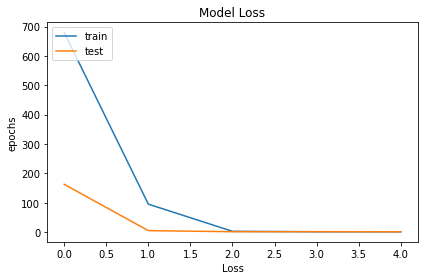

In [34]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

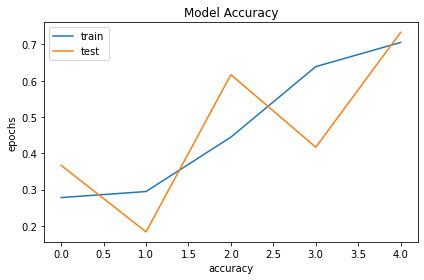

In [35]:
plt.plot(model_data.history['acc'])
plt.plot(model_data.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [36]:
image_name = test_images[0:1]
label_names = test_labels[0:1]

predicted = model.predict(np.array(image_name))
output = {0: 'apple', 
         1: "banana",
         2: 'mixed',
         3: 'orange'}


print("Actual values names: \t", label_names)
print("Pridicted Values names: \t", output[np.argmax(predicted)])

Actual values names: 	 ['apple']
Pridicted Values names: 	 apple


# Comment

In [ ]:

#I changed the data shape by (100,100),(250,250)(300,300).Atlast I put (150,150).After adding extra Neuron,It gives me
the Highest Accurecy:  0.7333333492279053 and Los:0.8903707265853882
# I also increas the Dence size by (30,20)and (50,25).Instead of activation Function tanh I used relu function.
#Finally,I got the result that The acctual image and my predicted image are same: Apple

## Conclution:The Model has worked proprly for the given Datasets.
